# Pre-processing dati clorofilla a 300m

In questo foglio vengono fatte le prime valutazioni dui nuovi dati messi a disposizione da CMEMS e scaricati tramite ftp.


In [30]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np
# import plt
import matplotlib.pyplot as plt


In [7]:
# origin path
pathOR = '/mnt/i/plankton/'
pathDEST = '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily300m/'
pathCOARS =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily300m_coarsened/'
pathCOARS =  'D:/Dropbox/R_projects/SV_phenology/data/daily300m_coarsened_bis/'
pathDEST = 'D:/Dropbox/R_projects/SV_phenology/data/daily300m_bis/'
#pathCOARS =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily300m_coarsened/'
pathOLD = 'D:/Dropbox/R_projects/SV_phenology/data/daily_coarsened/'

In [8]:
year = 2022
month = 6
day = 12

# carico una già coarsened
ds_co = xr.open_dataset(pathOLD + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month))
# seleziono il 12 giugno
ds_co = ds_co.sel(time='{}-{:02d}-{:02d}'.format(year, month, day))
ds_co

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056)
Coordinates:
    time       datetime64[ns] 2022-06-12
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    CHL        (latitude, longitude) float32 ...

In [9]:
ds_co.CHL.plot()

In [10]:
 month_dir = pathDEST + str(year) + '/' + '{:02d}'.format(month)  
 month_dir

'D:/Dropbox/R_projects/SV_phenology/data/daily300m_bis/2022/06'

In [11]:
ds = xr.open_mfdataset(month_dir + '/*.nc', combine='by_coords')
ds = ds.rename({'x': 'longitude', 'y': 'latitude'})  
ds

<xarray.Dataset>
Dimensions:        (longitude: 4227, latitude: 4806, time: 30)
Coordinates:
  * longitude      (longitude) float64 -4.993 -4.98 -4.967 ... 49.92 49.93 49.94
  * latitude       (latitude) float64 84.99 84.99 84.99 ... 72.01 72.01 72.01
  * time           (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-06-30
Data variables:
    stereographic  (time) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    CHL            (time, latitude, longitude) float32 dask.array<chunksize=(1, 4806, 4227), meta=np.ndarray>
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D
    cmems_product_id:        OCEANCOLOUR_ARC_BGC_L3_MY_009_123
    stop_date:               2022-06-01
    creation_date:           2023-08-30
    creation_time:           21:46:35 UTC

In [12]:
ds_co = ds_co.drop_vars('time')



In [13]:

target_latitude = ds_co.latitude.values
target_longitude = ds_co.longitude.values

target_latitude


array([84.99479167, 84.984375  , 84.97395833, ..., 72.02604167,
       72.015625  , 72.00520833])

In [14]:
ds

<xarray.Dataset>
Dimensions:        (longitude: 4227, latitude: 4806, time: 30)
Coordinates:
  * longitude      (longitude) float64 -4.993 -4.98 -4.967 ... 49.92 49.93 49.94
  * latitude       (latitude) float64 84.99 84.99 84.99 ... 72.01 72.01 72.01
  * time           (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-06-30
Data variables:
    stereographic  (time) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    CHL            (time, latitude, longitude) float32 dask.array<chunksize=(1, 4806, 4227), meta=np.ndarray>
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D
    cmems_product_id:        OCEANCOLOUR_ARC_BGC_L3_MY_009_123
    stop_date:               2022-06-01
    creation_date:           2023-08-30
    creation_time:           21:46:35 UTC

In [16]:

# set consistent _FillValue and missing_value attributes for the 'CHL' variable
encoding = {'CHL': {'_FillValue': -999.0, 'missing_value': -999.0}}

target_latitude = ds_co.latitude.values
target_longitude = ds_co.longitude.values
ds_grid = ds_co[['latitude', 'longitude']]

ds_co.close

# loop for each year within 1998 and 2022
for year in range(2022,2024):
    # loop for each month within march and october

    # create a folder for each year in path outh, if does not exist already
    os.makedirs(pathCOARS + '{}'.format(year), exist_ok=True)
    
    for month in range(3, 11):
        # temp path concatenate folder for year and month (e.g. 1998/03), with month in two digits
        
        month_dir = os.path.join(pathDEST, str(year), '{:02d}'.format(month))
        
        
                    # Check if the file already exists in the destination directory
        # if os.path.exists(pathCOARS + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month)):
        #     print("File already exists in destination. Skipping...")
        #     continue
        
        # read all nc in month_dir
        ds = xr.open_mfdataset(month_dir + '/*.nc', combine='by_coords')
        
        ds = ds.rename({'x': 'longitude', 'y': 'latitude'})       
        # interpolate ds at the spatial resolution of ds_co
        ds_coarsened = ds.interp_like(ds_grid, method='nearest')
        # rename x and y to longitude and latitude


        # save the subset to a NetCDF file with the updated encoding (nome file= outp + year + 'CHL_03-10_{}_.nc'.format(year))
        ds_coarsened.to_netcdf(pathCOARS + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month), encoding=encoding)
               

        # close the dataset
        ds.close()

        # close the subset
        ds_coarsened.close()

        # print the year and month
        print(year, month)
        




 

2022 3
2022 4
2022 5
2022 6
2022 7
2022 8
2022 9
2022 10
2023 3
2023 4
2023 5
2023 6
2023 7
2023 8
2023 9
2023 10


devo rifare andare lo script quando lo script 0.5.1 ha finito di scaricare i dati


# Confronto
confronto i dati di clorofilla a 300m con quelli a 1km, tutti ricampionati alla stessa soluzione


In [18]:
month  = 6
year = 2022

In [19]:
ds_300 = xr.open_dataset(pathCOARS + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month))
ds_300

ds_300.close

<bound method DataWithCoords.close of <xarray.Dataset>
Dimensions:        (time: 30, latitude: 1248, longitude: 1056)
Coordinates:
  * time           (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-06-30
  * longitude      (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * latitude       (latitude) float64 84.99 84.98 84.97 ... 72.03 72.02 72.01
Data variables:
    stereographic  (time) int64 ...
    CHL            (time, latitude, longitude) float32 ...
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D
    cmems_product_id:        OCEANCOLOUR_ARC_BGC_L3_MY_009_123
 

In [20]:
# close ds_300
ds_300

<xarray.Dataset>
Dimensions:        (time: 30, latitude: 1248, longitude: 1056)
Coordinates:
  * time           (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-06-30
  * longitude      (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * latitude       (latitude) float64 84.99 84.98 84.97 ... 72.03 72.02 72.01
Data variables:
    stereographic  (time) int64 ...
    CHL            (time, latitude, longitude) float32 ...
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D
    cmems_product_id:        OCEANCOLOUR_ARC_BGC_L3_MY_009_123
    stop_date:               2022-06-01
    creation_date:           2023-08-30
    creation_time:           21:46:35 UTC

Text(0.5, 0.98, 'Chlorophyll-a concentration [mg/m^3] - OLCI 300m')

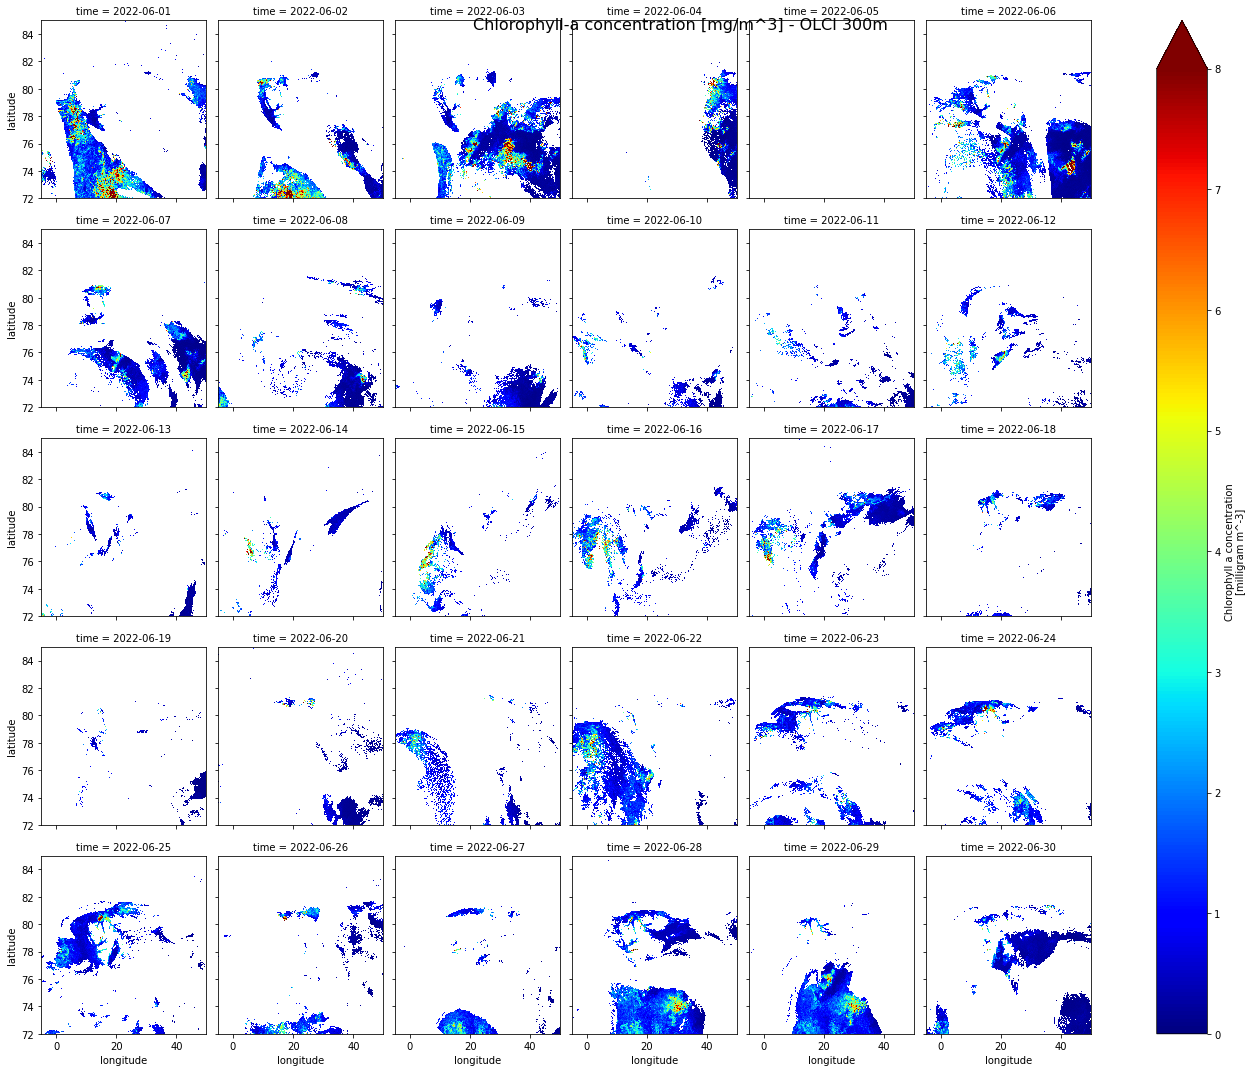

In [ ]:
# mappa di CHL per ogni mese con una finestra di 6 * 6 mappe (uno per giorno)
g = ds_300.CHL.plot(col='time', col_wrap=6, cmap='jet', vmin=0, vmax=8)
# title
g.fig.suptitle('Chlorophyll-a concentration [mg/m^3] - OLCI 300m', fontsize=16)




In [21]:
dsold = xr.open_dataset(pathOLD + '{}'.format(year) + '/CHL_03-10_{}_{}.nc'.format(year, month))



Text(0.5, 0.98, 'Chlorophyll-a concentration [mg/m^3] - CMEMS 1km')

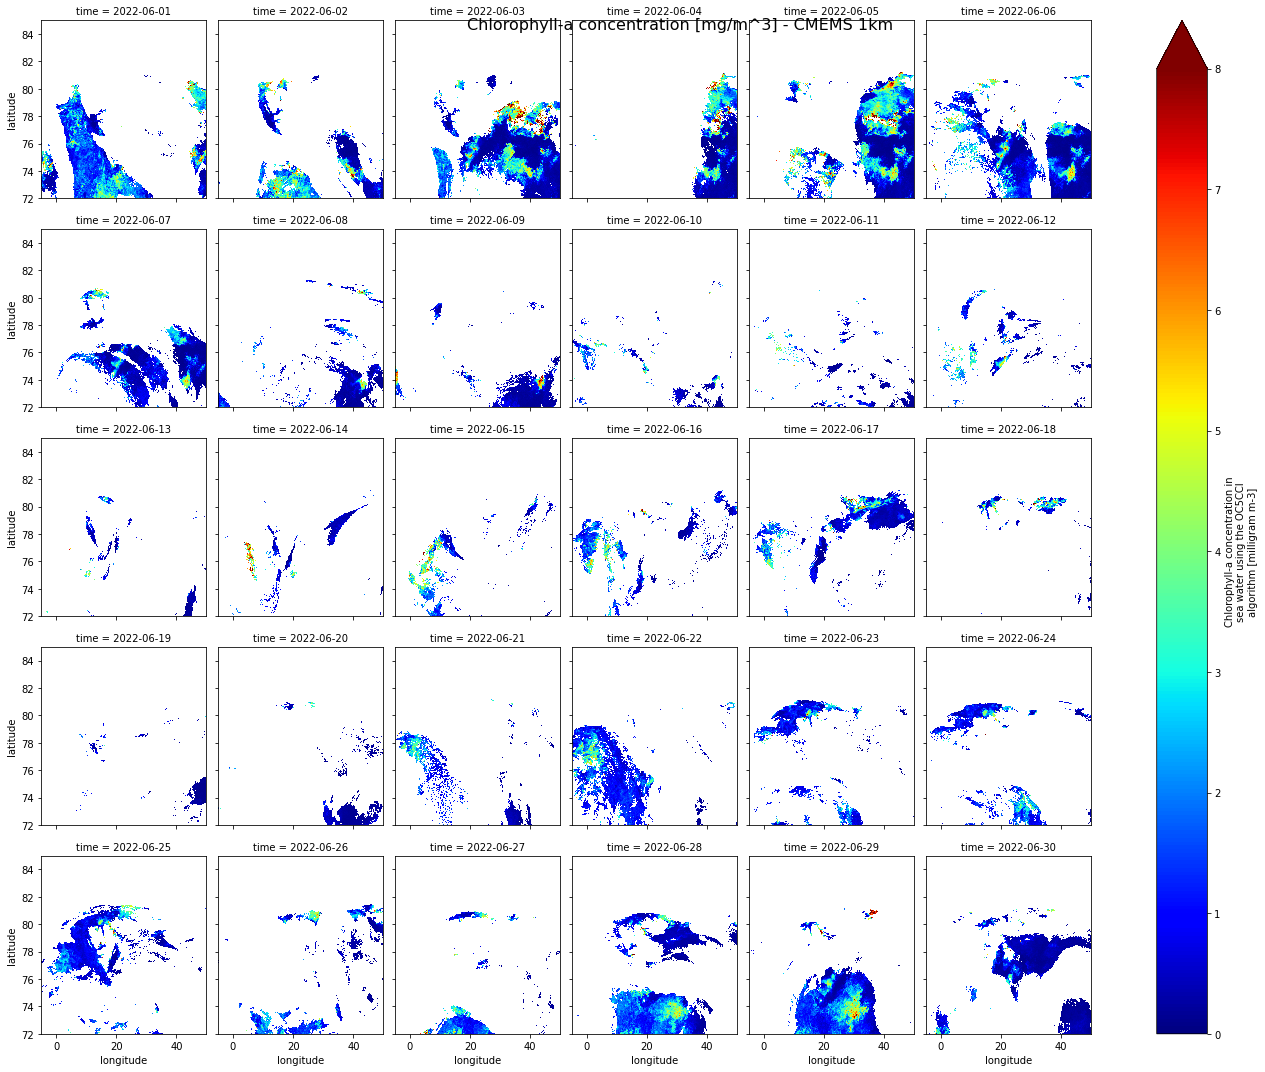

In [77]:
f = dsold.CHL.plot(col='time', col_wrap=6, cmap='jet', vmin=0, vmax=8)
# title
f.fig.suptitle('Chlorophyll-a concentration [mg/m^3] - CMEMS 1km', fontsize=16)

In [36]:
# seleziono il 6 giugno
day = 6


dsoldES = dsold.sel(time='{}-{:02d}-{:02d}'.format(year, month, day))
dsoldES

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056)
Coordinates:
    time       datetime64[ns] 2022-06-06
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    CHL        (latitude, longitude) float32 ...

In [33]:
day = 6
dsNewES = ds_300.sel(time='{}-{:02d}-{:02d}'.format(year, month, day))
dsNewES

<xarray.Dataset>
Dimensions:        (latitude: 1248, longitude: 1056)
Coordinates:
    time           datetime64[ns] 2022-06-06
  * longitude      (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * latitude       (latitude) float64 84.99 84.98 84.97 ... 72.03 72.02 72.01
Data variables:
    stereographic  int64 ...
    CHL            (latitude, longitude) float32 ...
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D
    cmems_product_id:        OCEANCOLOUR_ARC_BGC_L3_MY_009_123
    stop_date:               2022-06-01
    creation_date:           2023-08-30
    creation_time:           21:46:35 UTC

In [37]:
# calcolo la differenza percentuale
diff = (dsNewES.CHL - dsoldES.CHL) / dsoldES.CHL * 100

Text(0.5, 0.98, 'Chlorophyll-a concentration [mg/m^3] - 6 June 2022')

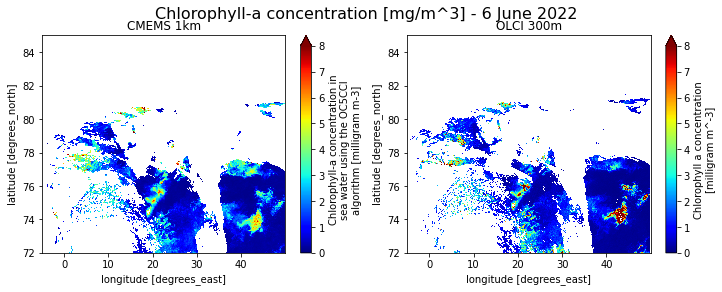

In [38]:
# li plotto affiancati
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
dsoldES.CHL.plot(ax=axes[0], cmap='jet', vmin=0, vmax=8)
axes[0].set_title('CMEMS 1km')
dsNewES.CHL.plot(ax=axes[1], cmap='jet', vmin=0, vmax=8)
axes[1].set_title('OLCI 300m')
fig.suptitle('Chlorophyll-a concentration [mg/m^3] - 6 June 2022', fontsize=16)



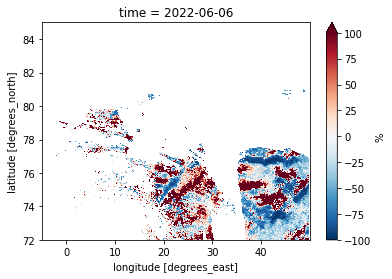

In [39]:
# plot diff
diff.plot(cmap='RdBu_r', vmin=-100, vmax=100, cbar_kwargs={'label': '%'})


In [41]:
import pandas as pd

In [42]:
# creo un data frame con il valori di CHL per ogni pixel del 6 giugno: una colonna per CMEMS e una per OLCI
df = pd.DataFrame({'CMEMS': dsoldES.CHL.values.flatten(), 'OLCI': dsNewES.CHL.values.flatten()})

Text(0, 0.5, 'OLCI 300m [mg/m^3]')

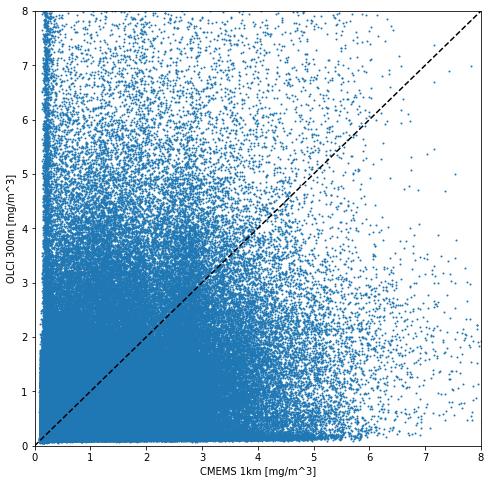

In [43]:
# scatter plot
df.plot.scatter(x='CMEMS', y='OLCI', figsize=(8, 8), s=1)
plt.plot([0, 8], [0, 8], color='black', linestyle='--')
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel('CMEMS 1km [mg/m^3]')
plt.ylabel('OLCI 300m [mg/m^3]')


In [48]:
dsNewES

<xarray.Dataset>
Dimensions:        (latitude: 1248, longitude: 1056)
Coordinates:
    time           datetime64[ns] 2022-06-06
  * longitude      (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * latitude       (latitude) float64 84.99 84.98 84.97 ... 72.03 72.02 72.01
Data variables:
    stereographic  int64 ...
    CHL            (latitude, longitude) float32 nan nan nan nan ... nan nan nan
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D
    cmems_product_id:        OCEANCOLOUR_ARC_BGC_L3_MY_009_123
    stop_date:               2022-06-01
    creation_date:           2023-08-30
    creation_time:           21:46:35 UTC

In [82]:
# c3s

# carico tutti i file in: D:\\Dropbox\\R_projects\\SV_phenology\\data\\C3S\\
pathC3S = "D:/Dropbox/R_projects/SV_phenology/data/C3S/"

ds3s = xr.open_mfdataset(pathC3S + '/*.nc', combine='by_coords')
#xr.open_mfdataset(month_dir + '/*.nc', combine='by_coords')
ds3s


<xarray.Dataset>
Dimensions:       (time: 30, lat: 4320, lon: 8640)
Coordinates:
  * lat           (lat) float64 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon           (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time          (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-06-30
Data variables:
    MERIS_nobs    (time, lat, lon) float32 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    MODISA_nobs   (time, lat, lon) float32 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    OLCI-A_nobs   (time, lat, lon) float32 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    OLCI-B_nobs   (time, lat, lon) float32 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    SeaWiFS_nobs  (time, lat, lon) float32 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    VIIRS_nobs    (time, lat, lon) float32 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    chlor_a       (time, lat, lon) float32 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
    crs           (time) int32 -2147483647 -2147483647 ... -2147483647
    total_nobs    (time, lat, lon) float32 dask.array<chunksize=(1, 270, 270), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                    CF-1.7
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    cdm_data_type:                  Grid
    comment:                        See summary attribute
    creation_date:                  20221201T172049Z
    creator_email:                  help@esa-oceancolour-cci.org
    ...                             ...
    time_coverage_resolution:       P1D
    time_coverage_start:            202206010000Z
    title:                          Copernicus Climate Change Service Ocean C...
    tracking_id:                    deb3bdae-cf6d-4a37-aad4-998a347f469d
    NCO:                            netCDF Operators version 4.7.5 (Homepage ...
    id:                             ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km...

In [83]:
# crop at the same coordinates as before
ds3s = ds3s.sel(lat=slice(86.0, 71), lon=slice(-6, 51))
ds3s

<xarray.Dataset>
Dimensions:       (time: 30, lat: 360, lon: 1368)
Coordinates:
  * lat           (lat) float64 85.98 85.94 85.9 85.85 ... 71.1 71.06 71.02
  * lon           (lon) float64 -5.979 -5.938 -5.896 -5.854 ... 50.9 50.94 50.98
  * time          (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-06-30
Data variables:
    MERIS_nobs    (time, lat, lon) float32 dask.array<chunksize=(1, 174, 144), meta=np.ndarray>
    MODISA_nobs   (time, lat, lon) float32 dask.array<chunksize=(1, 174, 144), meta=np.ndarray>
    OLCI-A_nobs   (time, lat, lon) float32 dask.array<chunksize=(1, 174, 144), meta=np.ndarray>
    OLCI-B_nobs   (time, lat, lon) float32 dask.array<chunksize=(1, 174, 144), meta=np.ndarray>
    SeaWiFS_nobs  (time, lat, lon) float32 dask.array<chunksize=(1, 174, 144), meta=np.ndarray>
    VIIRS_nobs    (time, lat, lon) float32 dask.array<chunksize=(1, 174, 144), meta=np.ndarray>
    chlor_a       (time, lat, lon) float32 dask.array<chunksize=(1, 174, 144), meta=np.ndarray>
    crs           (time) int32 -2147483647 -2147483647 ... -2147483647
    total_nobs    (time, lat, lon) float32 dask.array<chunksize=(1, 174, 144), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                    CF-1.7
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    cdm_data_type:                  Grid
    comment:                        See summary attribute
    creation_date:                  20221201T172049Z
    creator_email:                  help@esa-oceancolour-cci.org
    ...                             ...
    time_coverage_resolution:       P1D
    time_coverage_start:            202206010000Z
    title:                          Copernicus Climate Change Service Ocean C...
    tracking_id:                    deb3bdae-cf6d-4a37-aad4-998a347f469d
    NCO:                            netCDF Operators version 4.7.5 (Homepage ...
    id:                             ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km...

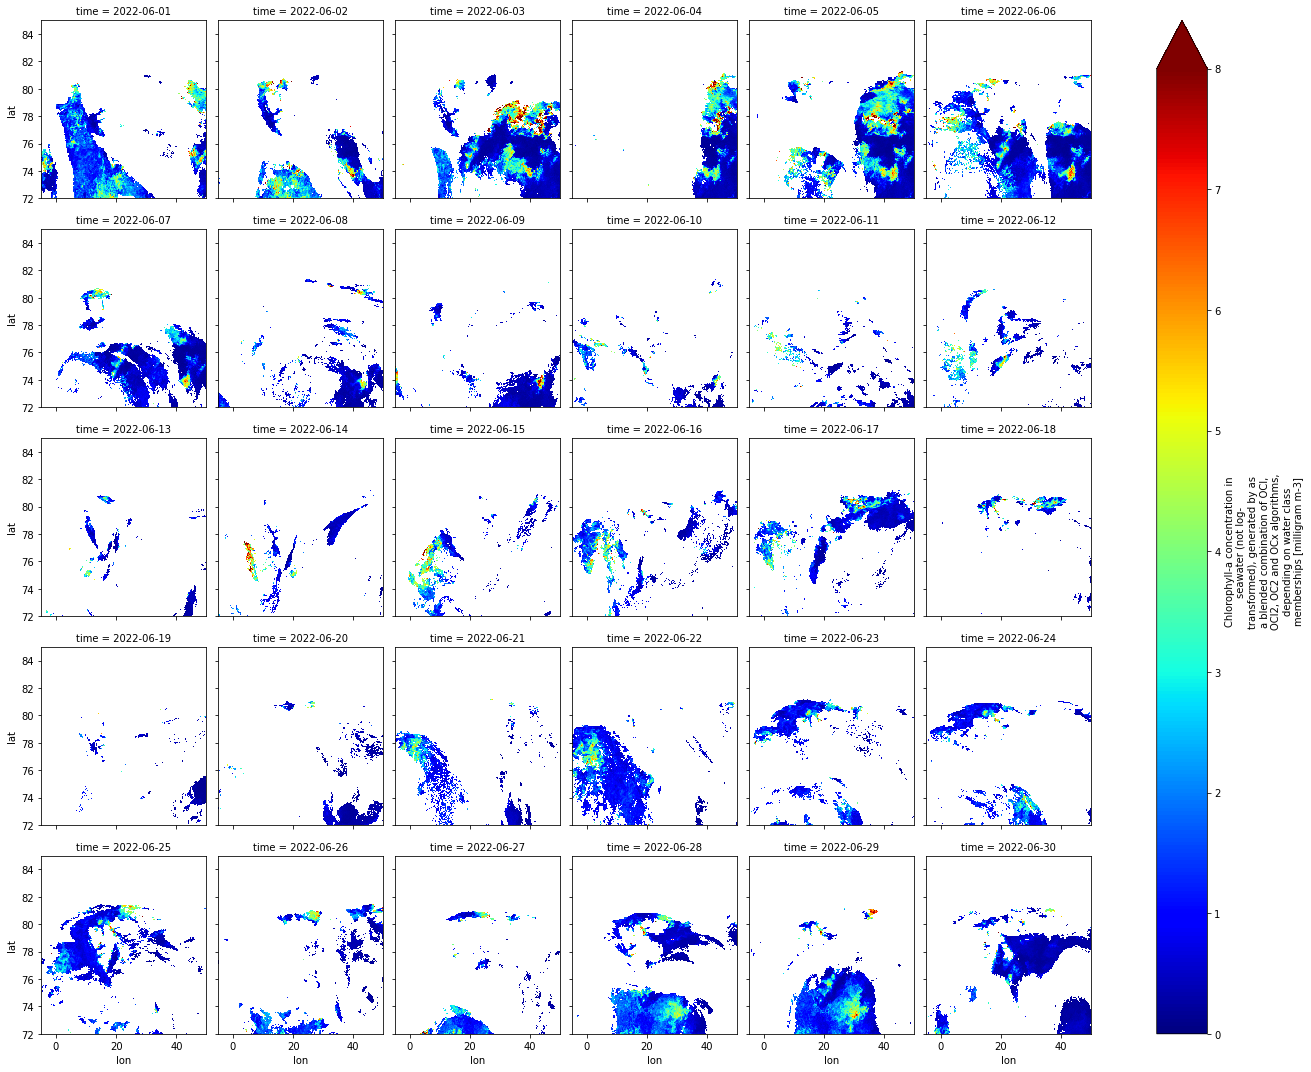

In [77]:
# plot
ds3s.chlor_a.plot(cmap='jet', vmin=0, vmax=8,col='time', col_wrap=6)
#dsold.CHL.plot(col='time', col_wrap=6, cmap='jet', vmin=0, vmax=8)

In [84]:
# Bounds for ds3s
lat_bounds_ds3s = (ds3s['lat'].min().values, ds3s['lat'].max().values)
lon_bounds_ds3s = (ds3s['lon'].min().values, ds3s['lon'].max().values)

# Bounds for dsNewES
lat_bounds_dsNewES = (dsNewES['latitude'].min().values, dsNewES['latitude'].max().values)
lon_bounds_dsNewES = (dsNewES['longitude'].min().values, dsNewES['longitude'].max().values)

print("Bounds for ds3s:", lat_bounds_ds3s, lon_bounds_ds3s)
print("Bounds for dsNewES:", lat_bounds_dsNewES, lon_bounds_dsNewES)

Bounds for ds3s: (array(71.02083333), array(85.97916667)) (array(-5.97916667), array(50.97916667))
Bounds for dsNewES: (array(72.00520833), array(84.99479167)) (array(-4.99479167), array(49.953125))


In [56]:
# seleziono il 6 giugno
ds3s_sel = ds3s.sel(time='{}-{:02d}-{:02d}'.format(year, month, day))
ds3s_sel



In [85]:
overlap_lat_bounds = (max(lat_bounds_ds3s[0], lat_bounds_dsNewES[0]), min(lat_bounds_ds3s[1], lat_bounds_dsNewES[1]))
overlap_lon_bounds = (max(lon_bounds_ds3s[0], lon_bounds_dsNewES[0]), min(lon_bounds_ds3s[1], lon_bounds_dsNewES[1]))

# Verify that the bounds make sense and that there's an actual overlap
print("Overlapping bounds:", overlap_lat_bounds, overlap_lon_bounds)

# Subset dsNewES
new_lat = dsNewES['latitude'].sel(latitude=slice(*overlap_lat_bounds))
new_lon = dsNewES['longitude'].sel(longitude=slice(*overlap_lon_bounds))


Overlapping bounds: (array(72.00520833), array(84.99479167)) (array(-4.99479167), array(49.953125))


In [93]:
# seleziono solo il 6 giugno
ds3sES = ds3s.sel(time='{}-{:02d}-{:02d}'.format(year, month, day))
ds3sES

<xarray.Dataset>
Dimensions:       (lat: 360, lon: 1368)
Coordinates:
  * lat           (lat) float64 85.98 85.94 85.9 85.85 ... 71.1 71.06 71.02
  * lon           (lon) float64 -5.979 -5.938 -5.896 -5.854 ... 50.9 50.94 50.98
    time          datetime64[ns] 2022-06-06
Data variables:
    MERIS_nobs    (lat, lon) float32 dask.array<chunksize=(174, 144), meta=np.ndarray>
    MODISA_nobs   (lat, lon) float32 dask.array<chunksize=(174, 144), meta=np.ndarray>
    OLCI-A_nobs   (lat, lon) float32 dask.array<chunksize=(174, 144), meta=np.ndarray>
    OLCI-B_nobs   (lat, lon) float32 dask.array<chunksize=(174, 144), meta=np.ndarray>
    SeaWiFS_nobs  (lat, lon) float32 dask.array<chunksize=(174, 144), meta=np.ndarray>
    VIIRS_nobs    (lat, lon) float32 dask.array<chunksize=(174, 144), meta=np.ndarray>
    chlor_a       (lat, lon) float32 dask.array<chunksize=(174, 144), meta=np.ndarray>
    crs           int32 -2147483647
    total_nobs    (lat, lon) float32 dask.array<chunksize=(174, 144), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                    CF-1.7
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    cdm_data_type:                  Grid
    comment:                        See summary attribute
    creation_date:                  20221201T172049Z
    creator_email:                  help@esa-oceancolour-cci.org
    ...                             ...
    time_coverage_resolution:       P1D
    time_coverage_start:            202206010000Z
    title:                          Copernicus Climate Change Service Ocean C...
    tracking_id:                    deb3bdae-cf6d-4a37-aad4-998a347f469d
    NCO:                            netCDF Operators version 4.7.5 (Homepage ...
    id:                             ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km...

In [94]:
dsNewES

<xarray.Dataset>
Dimensions:        (latitude: 1248, longitude: 1056)
Coordinates:
    time           datetime64[ns] 2022-06-06
  * longitude      (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * latitude       (latitude) float64 84.99 84.98 84.97 ... 72.03 72.02 72.01
Data variables:
    stereographic  int64 ...
    CHL            (latitude, longitude) float32 nan nan nan nan ... nan nan nan
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D
    cmems_product_id:        OCEANCOLOUR_ARC_BGC_L3_MY_009_123
    stop_date:               2022-06-01
    creation_date:           2023-08-30
    creation_time:           21:46:35 UTC

In [96]:
ds3sES = ds3sES.rename({'lat': 'latitude', 'lon': 'longitude'})
ds3s_interpolated = ds3sES.interp_like(dsNewES, method='linear')
ds3s_interpolated


<xarray.Dataset>
Dimensions:       (latitude: 1248, longitude: 1056)
Coordinates:
    time          datetime64[ns] 2022-06-06
  * latitude      (latitude) float64 84.99 84.98 84.97 ... 72.03 72.02 72.01
  * longitude     (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    MERIS_nobs    (latitude, longitude) float32 dask.array<chunksize=(1248, 1056), meta=np.ndarray>
    MODISA_nobs   (latitude, longitude) float32 dask.array<chunksize=(1248, 1056), meta=np.ndarray>
    OLCI-A_nobs   (latitude, longitude) float32 dask.array<chunksize=(1248, 1056), meta=np.ndarray>
    OLCI-B_nobs   (latitude, longitude) float32 dask.array<chunksize=(1248, 1056), meta=np.ndarray>
    SeaWiFS_nobs  (latitude, longitude) float32 dask.array<chunksize=(1248, 1056), meta=np.ndarray>
    VIIRS_nobs    (latitude, longitude) float32 dask.array<chunksize=(1248, 1056), meta=np.ndarray>
    chlor_a       (latitude, longitude) float32 dask.array<chunksize=(1248, 1056), meta=np.ndarray>
    crs           int32 -2147483647
    total_nobs    (latitude, longitude) float32 dask.array<chunksize=(1248, 1056), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                    CF-1.7
    Metadata_Conventions:           Unidata Dataset Discovery v1.0
    cdm_data_type:                  Grid
    comment:                        See summary attribute
    creation_date:                  20221201T172049Z
    creator_email:                  help@esa-oceancolour-cci.org
    ...                             ...
    time_coverage_resolution:       P1D
    time_coverage_start:            202206010000Z
    title:                          Copernicus Climate Change Service Ocean C...
    tracking_id:                    deb3bdae-cf6d-4a37-aad4-998a347f469d
    NCO:                            netCDF Operators version 4.7.5 (Homepage ...
    id:                             ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km...

In [98]:
diff2 = (ds3s_interpolated.chlor_a - dsoldES.CHL) / dsoldES.CHL * 100
diff2

<xarray.DataArray (latitude: 1248, longitude: 1056)>
dask.array<mul, shape=(1248, 1056), dtype=float32, chunksize=(1248, 1056), chunktype=numpy.ndarray>
Coordinates:
    time       datetime64[ns] 2022-06-06
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95

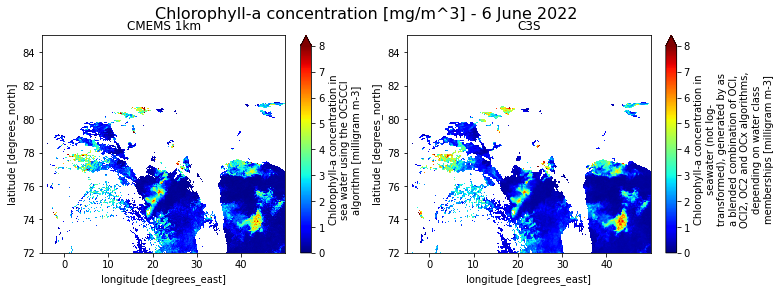

In [99]:
# li plotto affiancati
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
dsoldES.CHL.plot(ax=axes[0], cmap='jet', vmin=0, vmax=8)
axes[0].set_title('CMEMS 1km')
ds3s_interpolated.chlor_a.plot(ax=axes[1], cmap='jet', vmin=0, vmax=8)
axes[1].set_title('C3S')
fig.suptitle('Chlorophyll-a concentration [mg/m^3] - 6 June 2022', fontsize=16)
plt.show()


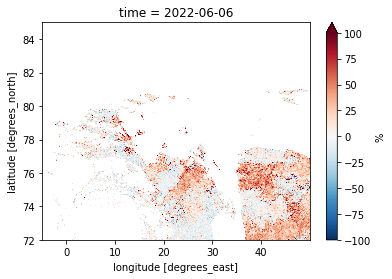

In [100]:
# plotto diff2
diff2.plot(cmap='RdBu_r', vmin=-100, vmax=100, cbar_kwargs={'label': '%'})

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        4.0000e+00, 8.0000e+00, 4.0000e+00, 1.3000e+01, 1.0000e+01,
        1.1000e+01, 1.1000e+01, 1.4000e+01, 2.9000e+01, 4.2000e+01,
        5.4000e+01, 6.6000e+01, 8.6000e+01, 1.0600e+02, 1.3800e+02,
        1.7100e+02, 2.2300e+02, 3.0500e+02, 3.4900e+02, 4.5500e+02,
        5.8200e+02, 6.9900e+02, 9.1100e+02, 1.0860e+03, 1.3290e+03,
        1.6640e+03, 2.0730e+03, 2.5220e+03, 3.0220e+03, 3.9090e+03,
        4.5320e+03, 5.4880e+03, 6.4810e+03, 7.4630e+03, 8.6080e+03,
        9.6190e+03, 1.0295e+04, 1.0780e+04, 1.0995e+04, 1.1070e+04,
        1.0938e+04, 1.0648e+04, 1.0152e+04, 9.8240e+03, 9.5580e+03,
        9.0290e+03, 8.6760e+03, 8.6330e+03, 8.2240e+03, 8.0430e+03,
        7.8090e+03, 7.7590e+03, 7.7340e+03, 7.6920e+03, 7.6600e+03,
        7.4800e+03, 7.1580e+03, 6.9930e+03, 6.5560e+03, 6.1270e+03,
        5.6210e+03, 5.1410e+03, 4.6430e+03, 3.91

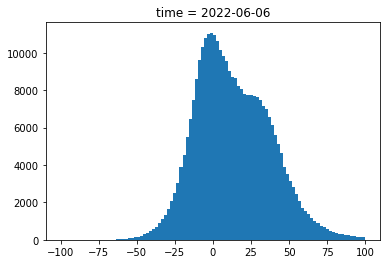

In [101]:
# istogramma di diff2
diff2.plot.hist(bins=100, range=(-100, 100))

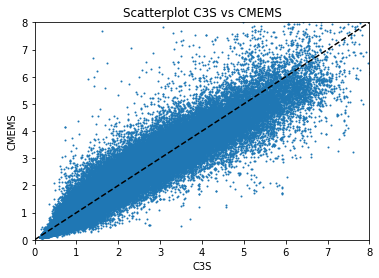

In [106]:
# creo un data frame con il valori di CHL per ogni pixel del 6 giugno: una colonna per CMEMS e una per OLCI e C3S
df = pd.DataFrame({'CMEMS': dsoldES.CHL.values.flatten(), 'OLCI': dsNewES.CHL.values.flatten(), 'C3S': ds3s_interpolated.chlor_a.values.flatten()})

# scatterplot  elinea 1:1
plt.plot([0, 8], [0, 8], color='black', linestyle='--')
plt.xlabel('C3S')
plt.ylabel('CMEMS')
plt.title('Scatterplot C3S vs CMEMS')
plt.xlim(0, 8)
plt.ylim(0, 8)
# aggiungo i punti
plt.scatter(x=df.C3S, y=df.CMEMS, s=1)



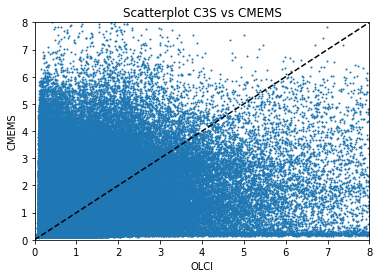

In [108]:

# scatterplot  elinea 1:1
plt.plot([0, 8], [0, 8], color='black', linestyle='--')
plt.xlabel('OLCI')
plt.ylabel('CMEMS')
plt.title('Scatterplot C3S vs CMEMS')
plt.xlim(0, 8)
plt.ylim(0, 8)
# aggiungo i punti
plt.scatter(x=df.OLCI, y=df.CMEMS, s=1)



# confronto dopo smoothing

In [109]:
ds_300smooth = ds_300.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean().rolling(longitude=3, center=True, min_periods=1).mean()
ds_300smooth

<xarray.Dataset>
Dimensions:        (time: 30, longitude: 1056, latitude: 1248)
Coordinates:
  * time           (time) datetime64[ns] 2022-06-01 2022-06-02 ... 2022-06-30
  * longitude      (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * latitude       (latitude) float64 84.99 84.98 84.97 ... 72.03 72.02 72.01
Data variables:
    stereographic  (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    CHL            (time, latitude, longitude) float32 nan nan ... 0.1236 0.1138
Attributes: (12/34)
    netcdf_version:          v4
    Conventions:             CF-1.4
    platform:                Sentinel3A+B
    product_level:           L3
    contact:                 technical@gos.artov.isac.cnr.it
    references:              Zoffoli et al. (in preparation)
    ...                      ...
    noqi:                    No climatatology data available
    title:                   cmems_obs-oc_arc_bgc-plankton_my_l3-olci-300m_P1D
    cmems_product_id:        OCEANCOLOUR_ARC_BGC_L3_MY_009_123
    stop_date:               2022-06-01
    creation_date:           2023-08-30
    creation_time:           21:46:35 UTC

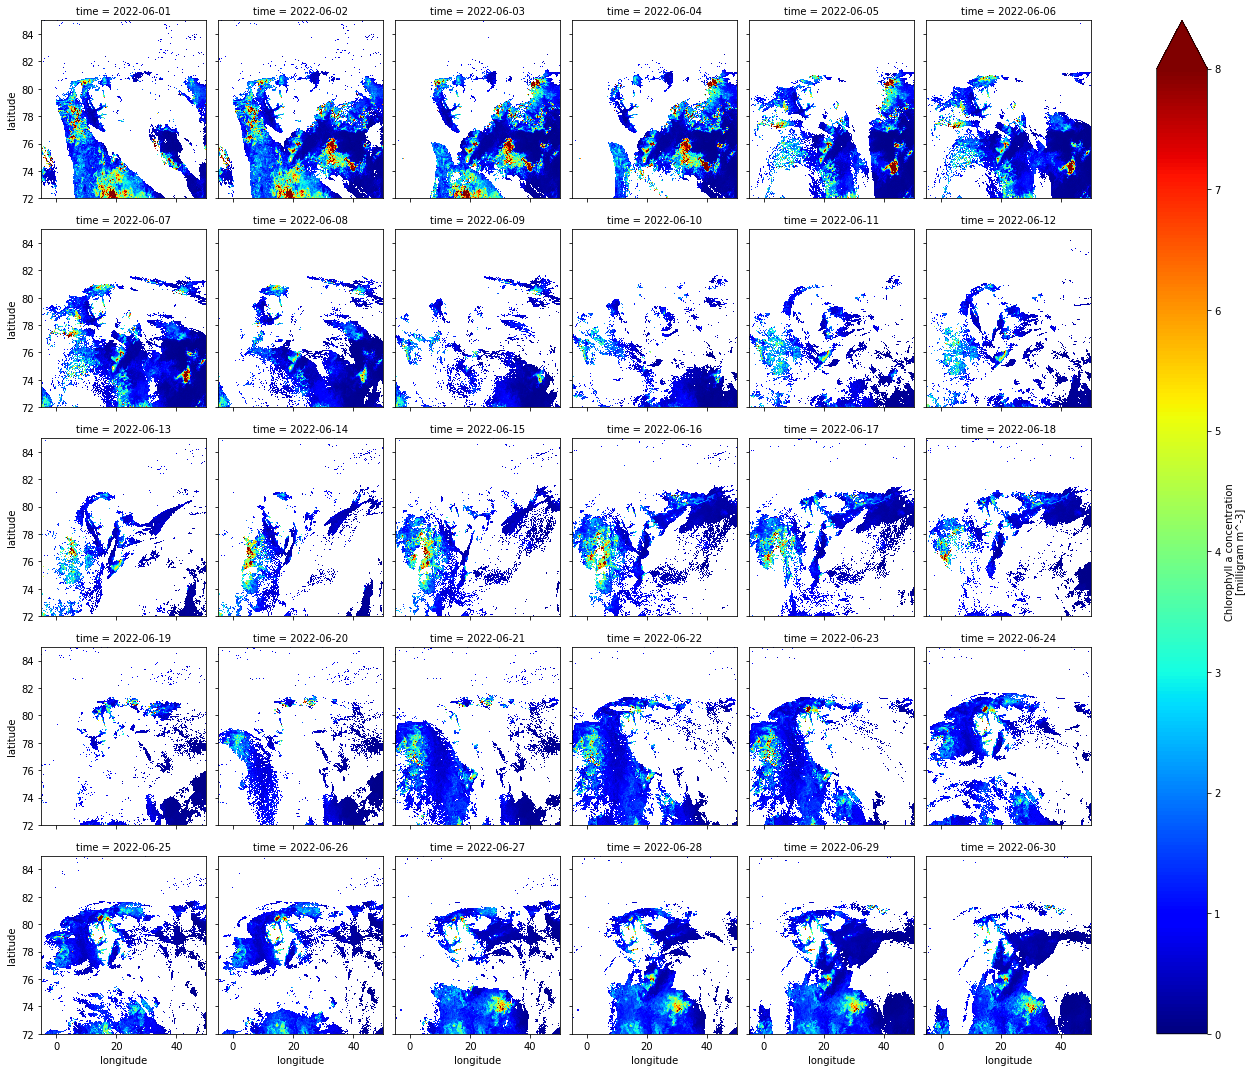

In [111]:
ds_300smooth.CHL.plot(col='time', col_wrap=6, cmap='jet', vmin=0, vmax=8)

# CMEMS 1km


In [112]:
dsold_smooth = dsold.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean().rolling(longitude=3, center=True, min_periods=1).mean()

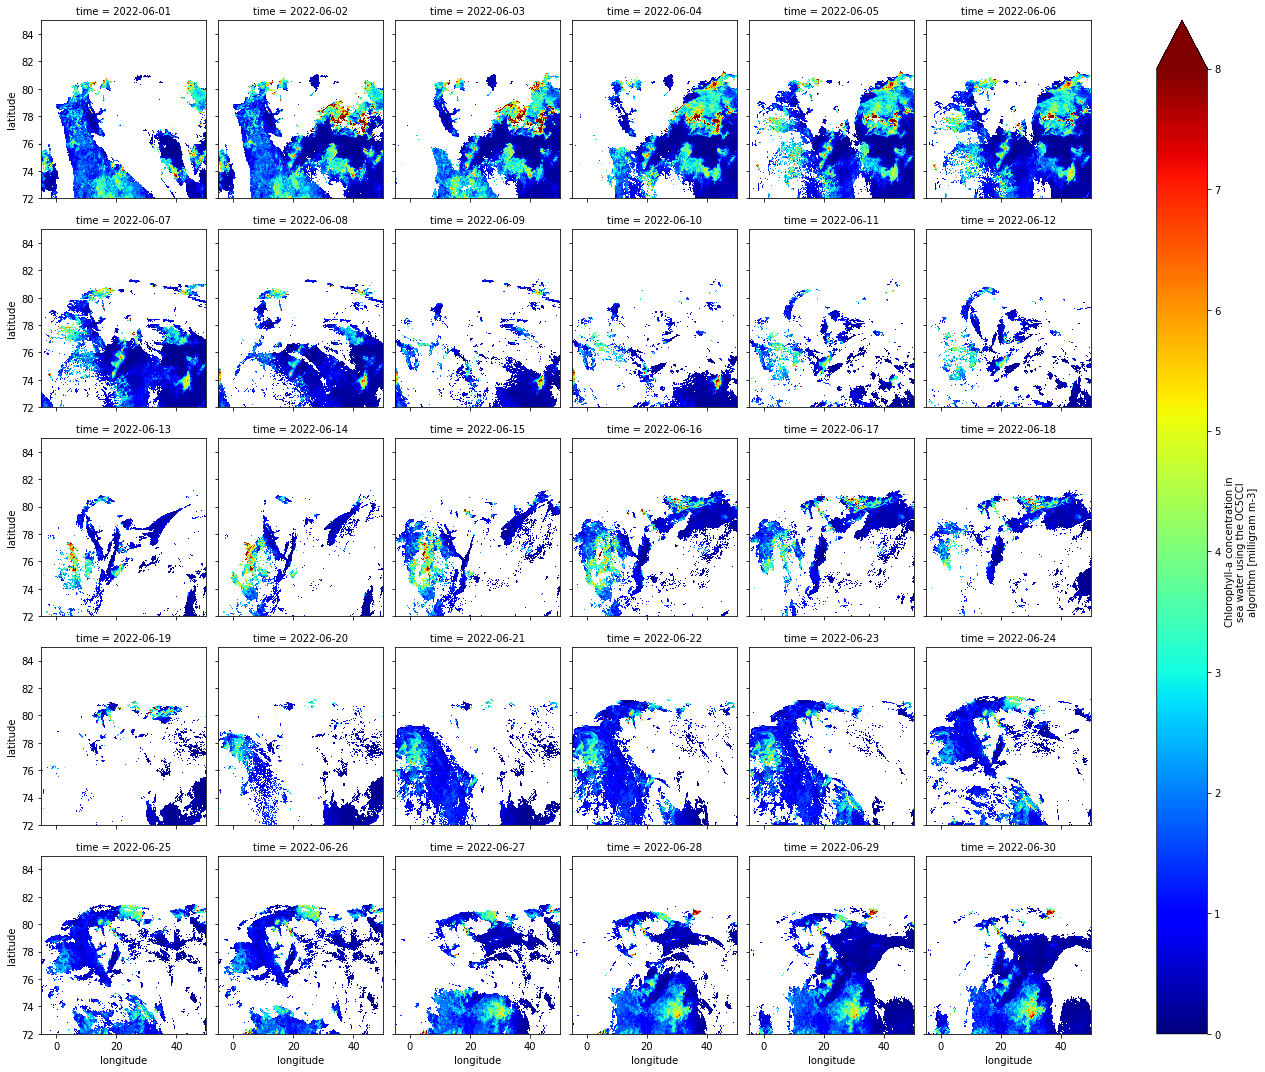

In [117]:
dsold_smooth.CHL.plot(col='time', col_wrap=6, cmap='jet', vmin=0, vmax=8)

# C3S


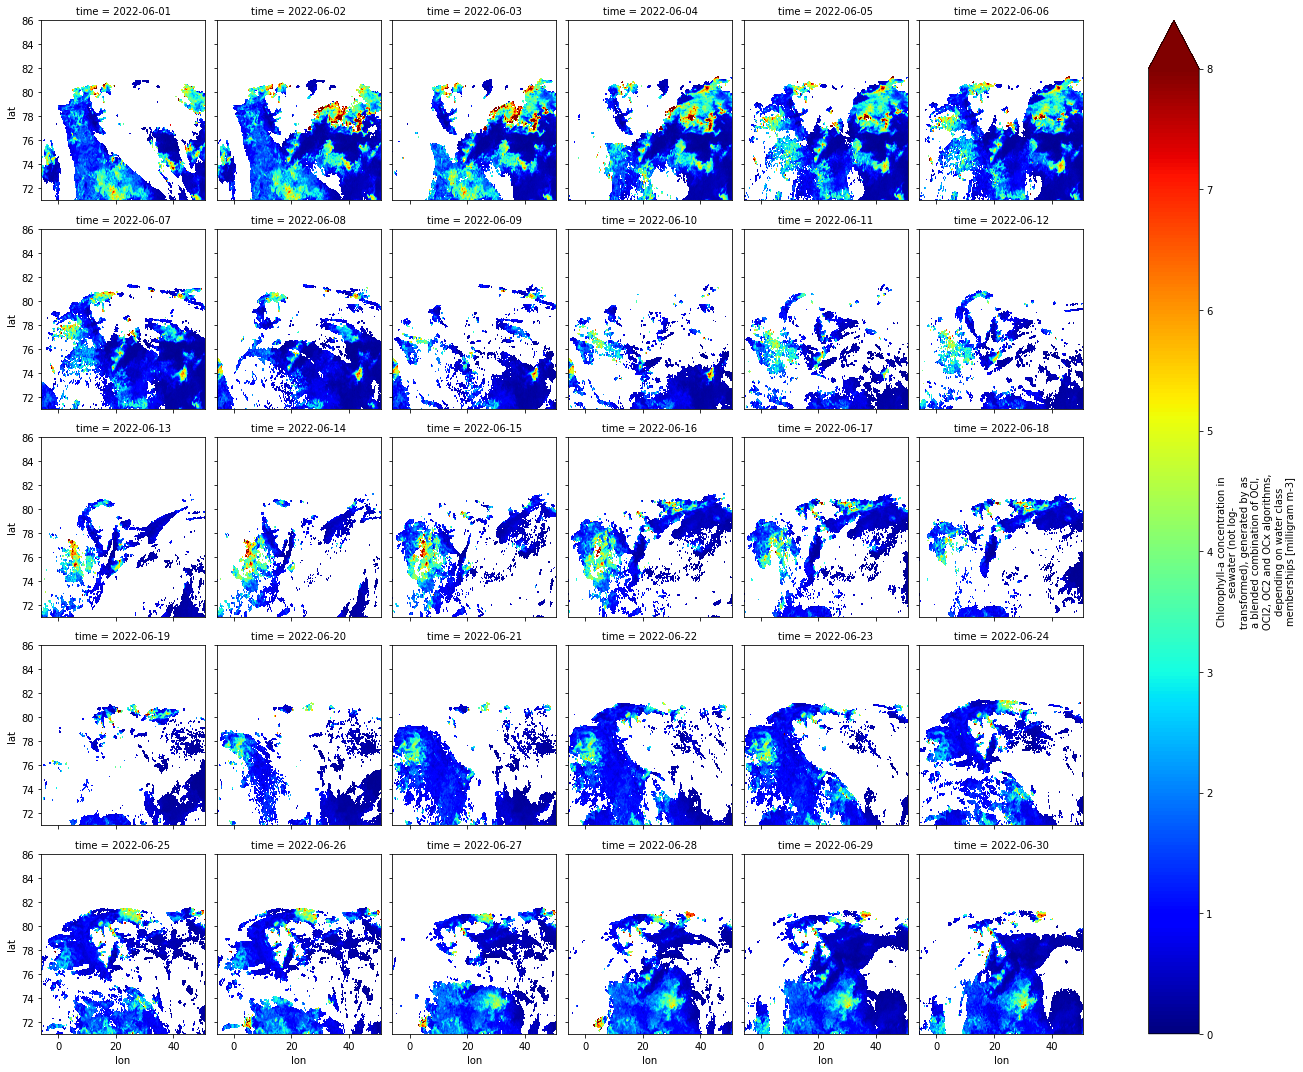

In [118]:
c3ssmooth = ds3s.rolling(time=3, center=True, min_periods=1).mean().rolling(lat=3, center=True, min_periods=1).mean().rolling(lon=3, center=True, min_periods=1).mean()
c3ssmooth.chlor_a.plot(col='time', col_wrap=6, cmap='jet', vmin=0, vmax=8)

esempio per il 6 giugno


In [119]:
ES_ds_300smooth = ds_300smooth.sel(time='{}-{:02d}-{:02d}'.format(year, month, day))
ES_dsold_smooth = dsold_smooth.sel(time='{}-{:02d}-{:02d}'.format(year, month, day))

preES_c3ssmooth = c3ssmooth.sel(time='{}-{:02d}-{:02d}'.format(year, month, day))
ES_c3ssmooth = preES_c3ssmooth.rename({'lat': 'latitude', 'lon': 'longitude'})
ES_c3ssmooth = ES_c3ssmooth.interp_like(ES_ds_300smooth, method='linear')

df = pd.DataFrame({'CMEMS': ES_dsold_smooth.CHL.values.flatten(), 'OLCI': ES_ds_300smooth.CHL.values.flatten(), 'C3S': ES_c3ssmooth.chlor_a.values.flatten()})


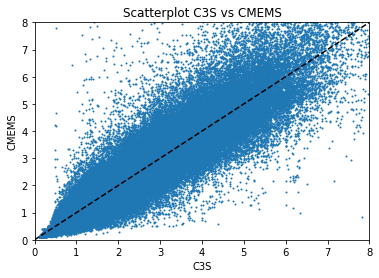

In [120]:
# scatterplot  elinea 1:1
plt.plot([0, 8], [0, 8], color='black', linestyle='--')
plt.xlabel('C3S')
plt.ylabel('CMEMS')
plt.title('Scatterplot C3S vs CMEMS')
plt.xlim(0, 8)
plt.ylim(0, 8)
# aggiungo i punti
plt.scatter(x=df.C3S, y=df.CMEMS, s=1)


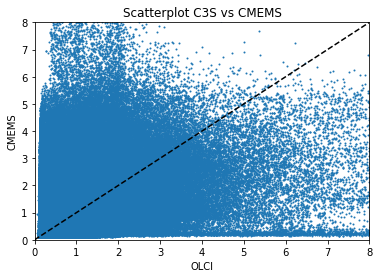

In [121]:
plt.plot([0, 8], [0, 8], color='black', linestyle='--')
plt.xlabel('OLCI')
plt.ylabel('CMEMS')
plt.title('Scatterplot C3S vs CMEMS')
plt.xlim(0, 8)
plt.ylim(0, 8)
# aggiungo i punti
plt.scatter(x=df.OLCI, y=df.CMEMS, s=1)

In [130]:
diffC3S = (ES_c3ssmooth.chlor_a - ES_dsold_smooth.CHL) / ES_dsold_smooth.CHL * 100
diffOLCI = (ES_ds_300smooth.CHL - ES_dsold_smooth.CHL) / ES_dsold_smooth.CHL * 100

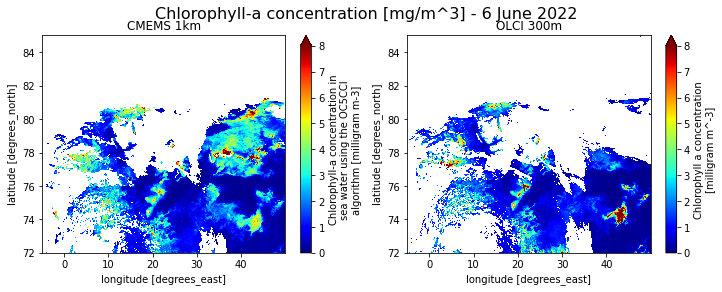

In [123]:
# li plotto affiancati
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
ES_dsold_smooth.CHL.plot(ax=axes[0], cmap='jet', vmin=0, vmax=8)
axes[0].set_title('CMEMS 1km')
ES_ds_300smooth.CHL.plot(ax=axes[1], cmap='jet', vmin=0, vmax=8)
axes[1].set_title('OLCI 300m')
fig.suptitle('Chlorophyll-a concentration [mg/m^3] - 6 June 2022', fontsize=16)
plt.show()


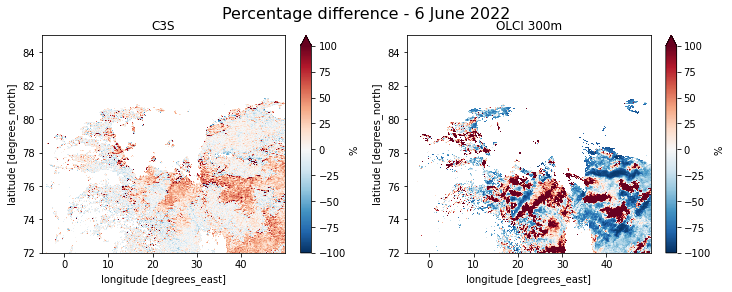

In [133]:
# plotto le differenze affiancate
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
diffC3S.plot(ax=axes[0], cmap='RdBu_r', vmin=-100, vmax=100, cbar_kwargs={'label': '%'})
axes[0].set_title('C3S')
diffOLCI.plot(ax=axes[1], cmap='RdBu_r', vmin=-100, vmax=100, cbar_kwargs={'label': '%'})
axes[1].set_title('OLCI 300m')
fig.suptitle('Percentage difference - 6 June 2022', fontsize=16)
plt.show()
